# Descriptive statistics in Python

Welcome to week 2 of 02402 Statistics (PF)

Today we will start using Python and in this notebook we will go through some basic descriptive statistics.

We will also start using the libraries: Numpy, Matplotlib and Pandas

In [2]:
# This the first "code" cell in this jupyter notebook
# all lines that start with a "#" are "commented out" 

In [3]:
# calculate 2+2
2+2

4

### Store sample data in a variable

In [4]:
# make a Python "list"
my_list = [1,2,3,4]

In [5]:
print(my_list)

[1, 2, 3, 4]


In [6]:
my_list*3

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [7]:
print(type(my_list))

<class 'list'>


We want to be able to work with a data type that behaves as a vector. For this we use Numpy arrays. 

We can store our sample data in a Numpy array. 

In [8]:
# import the Numpy library
import numpy as np

We will now work with a sample, consisting of 10 measurements of students heights. 

The 10 observations have the values: 168, 161, 167, 179, 184, 166, 198, 187, 191 and 179

In [9]:
# store sample data in variable x:
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

In [10]:
print(x)

[168 161 167 179 184 166 198 187 191 179]


In [11]:
print(type(x))

<class 'numpy.ndarray'>


### Calculating simple statistics

In [12]:
# calculate mean of x (average height of students)
np.mean(x)

np.float64(178.0)

In [13]:
# "mean()" can also be called as a method
x.mean()

np.float64(178.0)

Have a look in the online documentation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

The datatype "ndarray" (also called a numpy array) has many methods.

In [14]:
# lets try some other "methods"
x.min()

np.int64(161)

In [15]:
x.max()

np.int64(198)

In [16]:
# what about variance? 
# OBS: we need to remember ddof = 1 in order to calculate the "sample variance"
x.var(ddof=1)

np.float64(149.11111111111111)

Why ddof=1? have a look in the documentation for explanation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html


In [17]:
# standard deviation (also remember ddof=1 for "sample standard deviation")
x.std(ddof=1)

np.float64(12.211106056009468)

In [18]:
# what about the median?
x.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

no method called median? 

OK, then we call the median() function directly from numpy

In [ ]:
np.median(x)

np.float64(179.0)

In [ ]:
# we can also get other percentiles (50th percentile is the same as the median)
np.percentile(x, [0,10,25,50,75,90,100], method='averaged_inverted_cdf')

array([161. , 163.5, 167. , 179. , 187. , 194.5, 198. ])

In [58]:
# Python has two equivalent funtions for calculating quantiles: "percentile" and "quantile"
np.quantile(x, [0,0.10,0.25,0.50,0.75,0.90,1.00], method='averaged_inverted_cdf')

array([161. , 163.5, 167. , 179. , 187. , 194.5, 198. ])

In [92]:
q25, q75 = np.percentile(x, [25, 75], method='averaged_inverted_cdf')
iqr = q75 - q25
print(iqr)

20.0


In [91]:
q0, q100 = np.percentile(x, [0, 100], method='averaged_inverted_cdf')
range = q100 - q0
print(range)

37.0


In [59]:
# compare with sorted data
sorted_x = np.sort(x)
print(sorted_x)

[161 166 167 168 179 179 184 187 191 198]


Notice the method="averaged inverted cdf"  !<br>

There are many different ways to define percentiles!

See the documentaion: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html#numpy.percentile

In this course (and in the book) we always use the 'averaged_inverted_cdf' method.

### More complex data

We now add to the dataset 10 measurements of student weights. We store this data in variable y:

In [60]:
y = np.array([65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9])

In [61]:
print(x)
print(y)

[168 161 167 179 184 166 198 187 191 179]
[ 65.5  58.3  68.1  85.7  80.5  63.4 102.6  91.4  86.7  78.9]


In [62]:
# calculate covariance:
np.cov(x,y, ddof=1)

array([[149.11111111, 165.92222222],
       [165.92222222, 198.01655556]])

What are the four values?

In [63]:
# calculate correlation
np.corrcoef(x,y)

array([[1.        , 0.96560343],
       [0.96560343, 1.        ]])

Now have a look at Appendix A.1 in the book :)

What are the four values?

How do you interpret a correlation of 0.9656 ?

KAHOOT (x1)

## Data visualization

We use the matplotlib library to produce plots

In [64]:
# import the matplotlib.pyplot package 
import matplotlib.pyplot as plt

In [65]:
# Recall our sample data:
print(sorted_x)

[161 166 167 168 179 179 184 187 191 198]


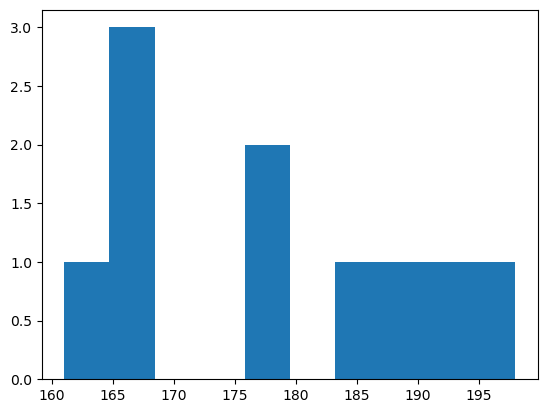

In [66]:
# Now make a histogram of the sample data
plt.hist(x)
plt.show()

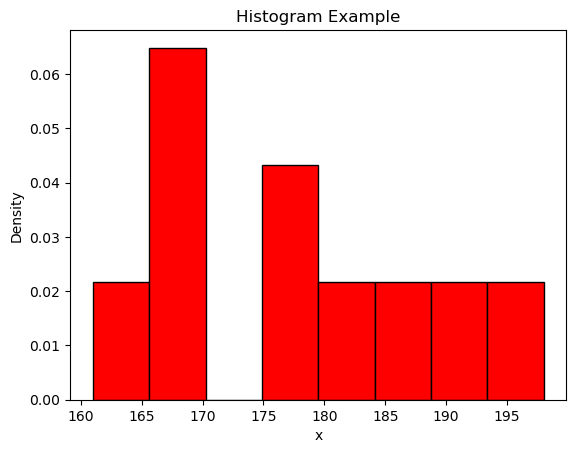

In [67]:
# Customize your histogram
plt.hist(x, bins=8, edgecolor='black', color='red', density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

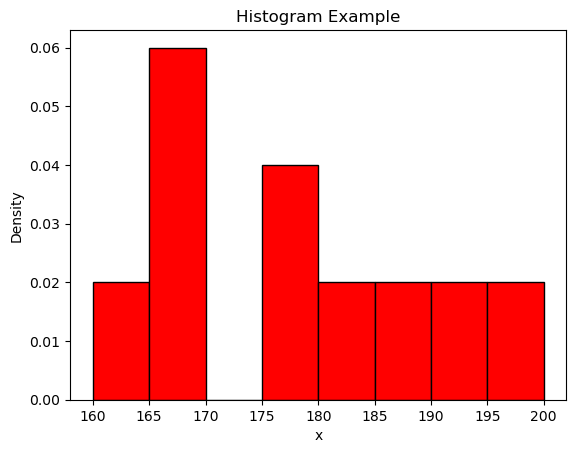

In [68]:
# specifying bin-edges:
plt.hist(x, bins=[160,165,170,175,180,185,190,195,200], edgecolor='black', color='red', density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

Histograms are important - they show how the data is **distributed** and are often the first choice of visualising a sample <br>

Histograms serve as *empirical distributions* ("empirical pdf")<br>

Based on the histogram above, how would you guess the height-distribution in the *population* looks like? <br> 

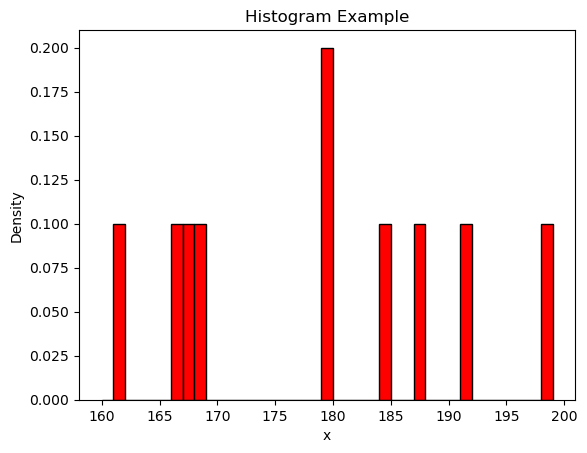

In [69]:
# lets try with really small bins, such that the histogram diplays all the details in the data:
plt.hist(x, bins=np.arange(160,200,1), edgecolor='black', color='red', density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

### Cumulative distribution

The "detailed" histogram with small bins is maybe not the nicest way to display data. <br>

But histograms are dependent on bin-choices, which is also (sometimes) not ideal.. <br>

An alternative is to do a cumulative kind of plot:

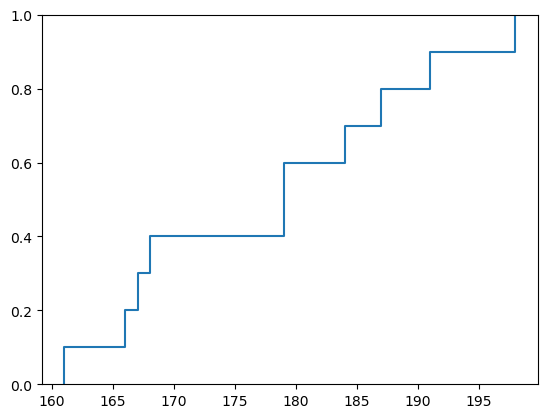

In [70]:
# plot the "empirical cumulated density function" (empirical cdf)
plt.ecdf(x)
plt.show()

In [71]:
# compare with values 
print(sorted_x)

[161 166 167 168 179 179 184 187 191 198]


In the cumulated distribution all detailed information is kept - but it is another way to visualise the distribution of data. 


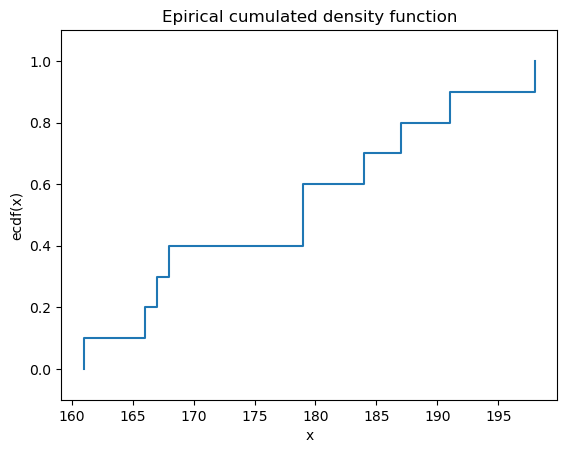

In [72]:
# lets increase the y-range slightly:
plt.ecdf(x)
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('ecdf(x)')
plt.title('Epirical cumulated density function')
plt.show()

The y-range goes from 0 to 1 (0% to 100%) <br>

Every vertical line-segment is a datapoint <br>

When the plot is "steep" there are many datapoints (corresponds to high values in the histogram). <br>

The cumulated plot can be used to understand the "averaged_inverted_cdf" used for percentiles. 
Example: If you want to find the 35% percentile, start by finding 0.35 on the y-axis. Then find the corresponding value on the x-axis. This is the value of the 35% percentile. <br>


KAHOOT (x2)

### Boxplot

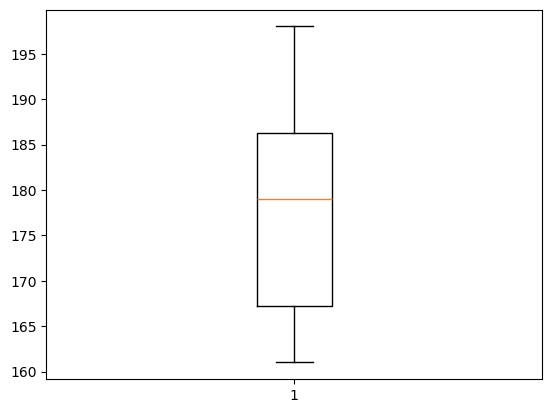

In [73]:
# make a boxplot
plt.boxplot(x)
plt.show()

Now the *values* are on the **y-axis**

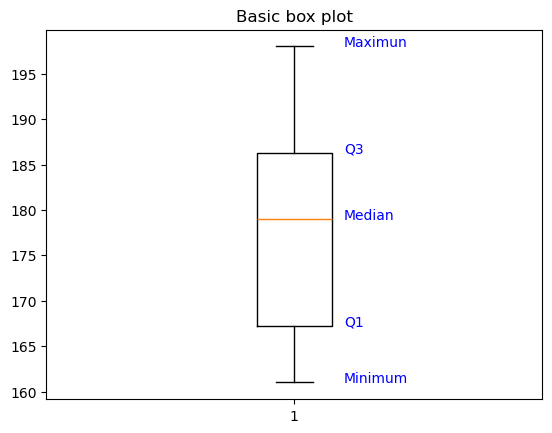

In [74]:
# Adding some explanation:
plt.boxplot(x)
plt.text(1.1, np.percentile(x,  [0]), 'Minimum', color='blue')
plt.text(1.1, np.percentile(x, [25]), 'Q1', color='blue')
plt.text(1.1, np.percentile(x, [50]), 'Median', color='blue')
plt.text(1.1, np.percentile(x, [75]), 'Q3', color='blue')
plt.text(1.1, np.percentile(x,[100]), 'Maximun', color='blue')
plt.title("Basic box plot")
plt.show()

see documentation for definition of box and whiskers: 

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot



In [75]:
# Adding an outlier to the data:
print(np.append(x, [235]))

[168 161 167 179 184 166 198 187 191 179 235]


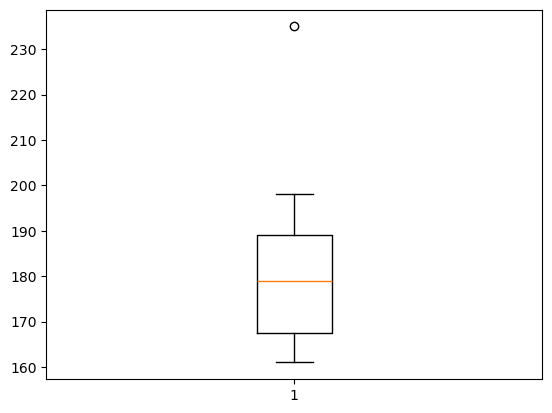

In [76]:
plt.boxplot(np.append(x, [235]))
plt.show()

In the plot above you see that "extreme values" are plotted individually. The "whiskers" do not extand all the way to min and max by default. 

You can control the whiskers by using the "whis=.." option:

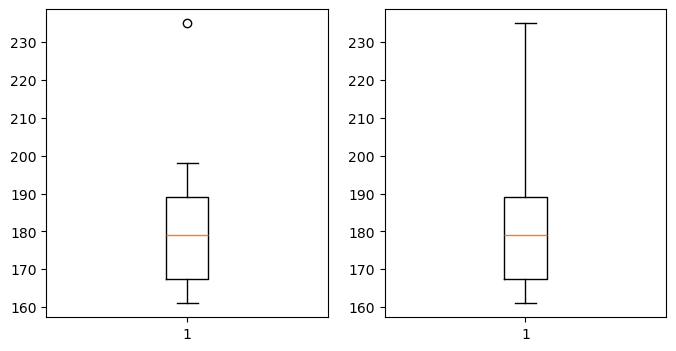

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))  # start by splitting the figure into two 
ax1.boxplot(np.append(x, [235]))                     # define first plot in the figure - default setting for whiskers
ax2.boxplot(np.append(x, [235]), whis=(0,100))       # define second plot in the figure - set whiskers manually
plt.show()                                           # now show the entire figure

### Scatter plot

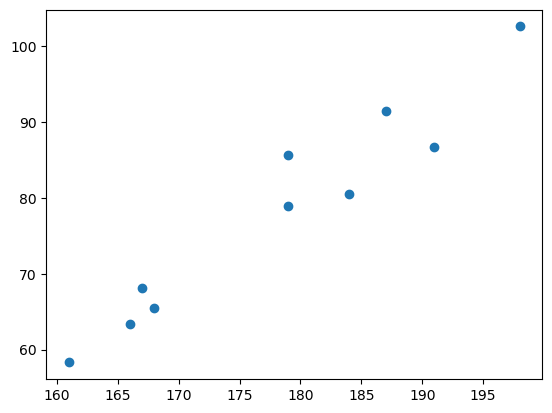

In [78]:
plt.scatter(x,y)
plt.show()

Do you remember the correlation? Does it match with the plot?

KAHOOT (x1)

### DataFrames

For more complex data (many rows and many columns) we will sometime use "DataFrames" from the Pandas library. 

In [79]:
# import the Pandas library
import pandas as pd 

We can put our previous height and weight data into a *DataFrame*:

In [80]:
student_data = pd.DataFrame({
    'height':  x,
    'weight':  y
})
student_data

,height,weight
0,168,65.5
1,161,58.3
2,167,68.1
3,179,85.7
4,184,80.5
5,166,63.4
6,198,102.6
7,187,91.4
8,191,86.7
9,179,78.9


In [81]:
print(type(student_data))

<class 'pandas.core.frame.DataFrame'>


In [82]:
# we could also type data directly into a DataFrame:
student_data = pd.DataFrame({
    'height':  [168, 161, 167, 179, 184, 166, 198, 187, 191, 179],
    'weight':  [65.5, 58.3, 68.1, 85.7, 80.5, 63.4, 102.6, 91.4, 86.7, 78.9]
})
student_data

,height,weight
0,168,65.5
1,161,58.3
2,167,68.1
3,179,85.7
4,184,80.5
5,166,63.4
6,198,102.6
7,187,91.4
8,191,86.7
9,179,78.9


It is good practice to have one *observational unit* in each row and different *observational variables* in the different columns. 

(recall Definition 1.1 from chapter 1 in the book)



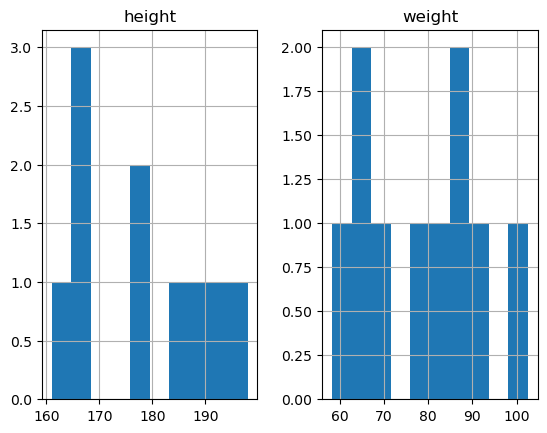

In [83]:
# The DataFrame has a direct method for making histograms:
student_data.hist()
plt.show()

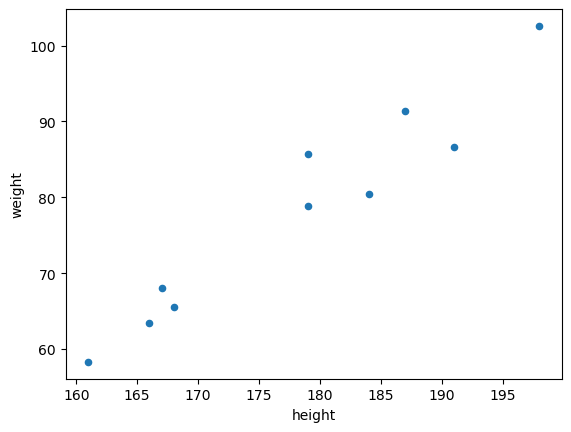

In [84]:
# The DataFrame also has a direct method for making a scatter plot:
student_data.plot.scatter("height", "weight")
plt.show()

### Reading data from an external file

It is very important to learn how to read data from other files. In practice one will never type all the data into Python by hand!

In [85]:
# read data from a csv file:
csv_data= pd.read_csv("studentheights.csv", sep=';')

In [86]:
# print the number of rows in the dataset:
print(len(csv_data))

40


In [87]:
# view the first few rows:
csv_data.head()

,Height,Gender
0,152,male
1,171,male
2,173,male
3,173,male
4,178,male


What is the data in the two columns?

What is the type of data in the two columns? (quantitative, qualitative ..?)

In [88]:
csv_data.describe(include='all')

,Height,Gender
count,40.00000,40
unique,NaN,2
top,NaN,male
freq,NaN,23
mean,177.87500,NaN
std,9.09265,NaN
min,152.00000,NaN
25%,172.75000,NaN
50%,177.50000,NaN
75%,185.00000,NaN


If we want to do a boxplot by gender, we need to include the "by=.." argument:

<Axes: title={'center': 'Height'}, xlabel='[Gender]'>

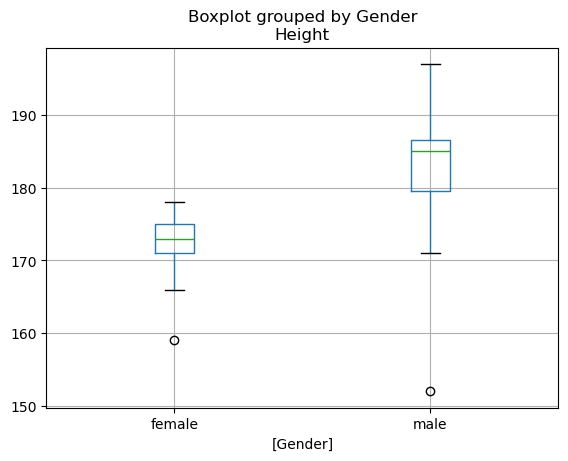

In [89]:
csv_data.boxplot(by='Gender')

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

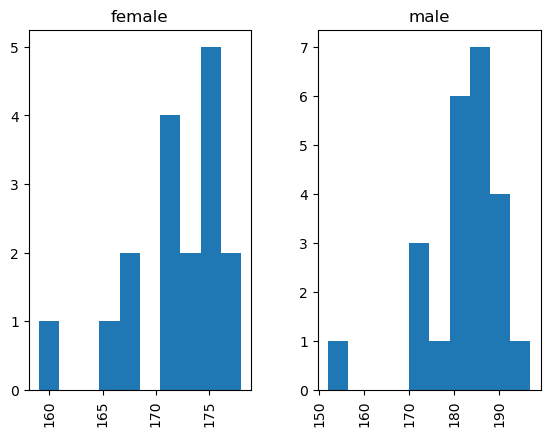

In [90]:
csv_data.hist(by="Gender")

What happens if we remove the "by=.." statement in the plots above?